In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,✅ Trip Verified | Starting off at Heathrow Te...
1,Not Verified | We have flown this route with ...
2,✅ Trip Verified | A last minute business trip ...
3,✅ Trip Verified | Overall I would say disapp...
4,Not Verified | LHR to Delhi in Business. Exce...
5,Not Verified | Efficient and Smooth flight fr...
6,✅ Trip Verified | Was told we can not take han...
7,Not Verified | The flight was comfortable eno...
8,✅ Trip Verified | We had a really good flying...
9,✅ Trip Verified | Waited an hour to check-in ...


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [6]:
df.head(10)

,reviews
0,Starting off at Heathrow Terminal 3. Check i...
1,We have flown this route with EasyJet regula...
2,"A last minute business trip to HND, a route I..."
3,Overall I would say disappointing. Due to B...
4,LHR to Delhi in Business. Exceptional flight...
5,Efficient and Smooth flight from start to fi...
6,Was told we can not take hand luggage onto th...
7,The flight was comfortable enough but with a...
8,We had a really good flying experience with ...
9,Waited an hour to check-in at the Paphos bus...


# #1 Text Cleaning


In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Starting off at Heathrow Terminal 3. Check i...,Starting off at Heathrow Terminal Check in wa...
1,We have flown this route with EasyJet regula...,We have flown this route with EasyJet regular...
2,"A last minute business trip to HND, a route I...",A last minute business trip to HND a route I ...
3,Overall I would say disappointing. Due to B...,Overall I would say disappointing Due to BA s...
4,LHR to Delhi in Business. Exceptional flight...,LHR to Delhi in Business Exceptional flight S...


# #2 Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

## 3 Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.



## 4 Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

# #5 Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data.

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries


In [8]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Starting off at Heathrow Terminal 3. Check i...,Starting off at Heathrow Terminal Check in wa...,"[(Starting, v), (Heathrow, n), (Terminal, n), ..."
1,We have flown this route with EasyJet regula...,We have flown this route with EasyJet regular...,"[(flown, v), (route, n), (EasyJet, n), (regula..."
2,"A last minute business trip to HND, a route I...",A last minute business trip to HND a route I ...,"[(last, a), (minute, n), (business, n), (trip,..."
3,Overall I would say disappointing. Due to B...,Overall I would say disappointing Due to BA s...,"[(Overall, a), (would, None), (say, v), (disap..."
4,LHR to Delhi in Business. Exceptional flight...,LHR to Delhi in Business Exceptional flight S...,"[(LHR, n), (Delhi, n), (Business, n), (Excepti..."


In [10]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Starting off at Heathrow Terminal 3. Check i...,Starting off at Heathrow Terminal Check in wa...,"[(Starting, v), (Heathrow, n), (Terminal, n), ...",Starting Heathrow Terminal Check fairly easy...
1,We have flown this route with EasyJet regula...,We have flown this route with EasyJet regular...,"[(flown, v), (route, n), (EasyJet, n), (regula...",fly route EasyJet regularly twenty year age ...
2,"A last minute business trip to HND, a route I...",A last minute business trip to HND a route I ...,"[(last, a), (minute, n), (business, n), (trip,...",last minute business trip HND route regularl...
3,Overall I would say disappointing. Due to B...,Overall I would say disappointing Due to BA s...,"[(Overall, a), (would, None), (say, v), (disap...",Overall would say disappointing Due BA statu...
4,LHR to Delhi in Business. Exceptional flight...,LHR to Delhi in Business Exceptional flight S...,"[(LHR, n), (Delhi, n), (Business, n), (Excepti...",LHR Delhi Business Exceptional flight Stylis...


In [11]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Starting off at Heathrow Terminal 3. Check i...,Starting Heathrow Terminal Check fairly easy...
1,We have flown this route with EasyJet regula...,fly route EasyJet regularly twenty year age ...
2,"A last minute business trip to HND, a route I...",last minute business trip HND route regularl...
3,Overall I would say disappointing. Due to B...,Overall would say disappointing Due BA statu...
4,LHR to Delhi in Business. Exceptional flight...,LHR Delhi Business Exceptional flight Stylis...
...,...,...
995,The booking process was easy enough but they...,booking process easy enough reduce baggage a...
996,London to Tokyo Narita. Had a fantastic flig...,London Tokyo Narita fantastic flight new BA ...
997,Bridgetown to London Gatwick. Paid for a Bus...,Bridgetown London Gatwick Paid Business Clas...
998,St Lucia to Gatwick on which my wife and I w...,St Lucia Gatwick wife involuntarily downgrad...


##Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [12]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Starting off at Heathrow Terminal 3. Check i...,Starting off at Heathrow Terminal Check in wa...,"[(Starting, v), (Heathrow, n), (Terminal, n), ...",Starting Heathrow Terminal Check fairly easy...,0.9969,Positive
1,We have flown this route with EasyJet regula...,We have flown this route with EasyJet regular...,"[(flown, v), (route, n), (EasyJet, n), (regula...",fly route EasyJet regularly twenty year age ...,0.9847,Positive
2,"A last minute business trip to HND, a route I...",A last minute business trip to HND a route I ...,"[(last, a), (minute, n), (business, n), (trip,...",last minute business trip HND route regularl...,0.9794,Positive
3,Overall I would say disappointing. Due to B...,Overall I would say disappointing Due to BA s...,"[(Overall, a), (would, None), (say, v), (disap...",Overall would say disappointing Due BA statu...,-0.7281,Negative
4,LHR to Delhi in Business. Exceptional flight...,LHR to Delhi in Business Exceptional flight S...,"[(LHR, n), (Delhi, n), (Business, n), (Excepti...",LHR Delhi Business Exceptional flight Stylis...,0.9788,Positive


In [14]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    480
Negative    412
Neutral     108
Name: Analysis, dtype: int64

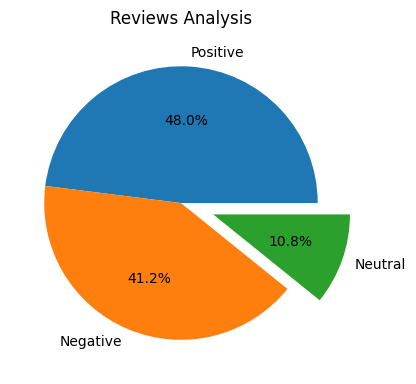

In [16]:
#Visual Representation
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
df.to_csv("BA_reviews.csv")

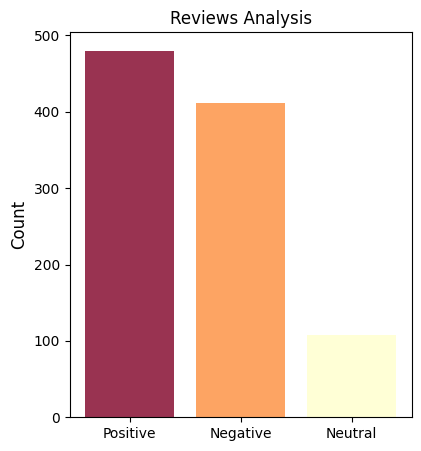

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 2)
plt.title("Reviews Analysis")
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0, ha='center')

# Create a list of colors based on the values in the dataframe
color_palette = plt.get_cmap('YlOrRd_r')
colors = color_palette(np.linspace(0, 1, len(vader_counts.index)))

# Plot the bar graph with colors
plt.bar(vader_counts.index, vader_counts.values, alpha=0.8, color=colors)

# Save the plot to a file
plt.savefig("BA_reviews_bargraph_color.png")

# Display the plot
plt.show()

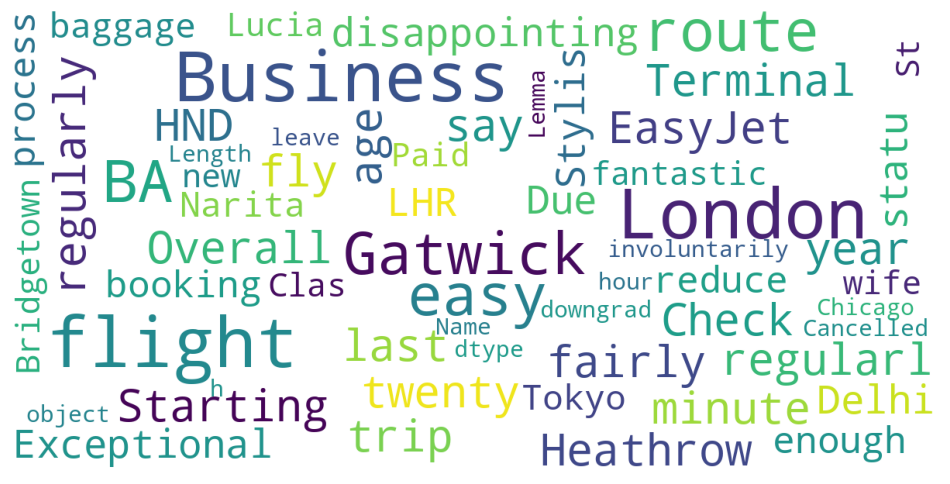

In [18]:
#Wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)